<a href="https://colab.research.google.com/github/PGoyal-06/Computer_Vision/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating some data to view and fit

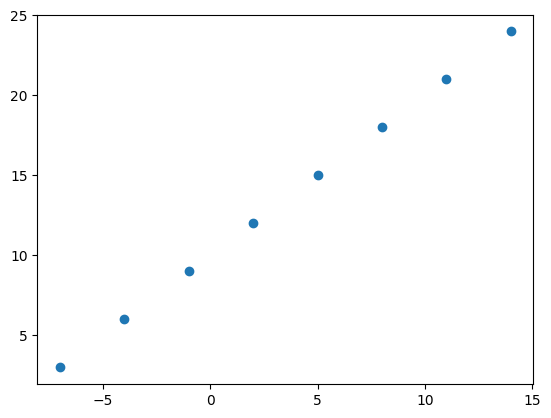

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn our numpy arrays into tensors with type float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
ouput_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), ())

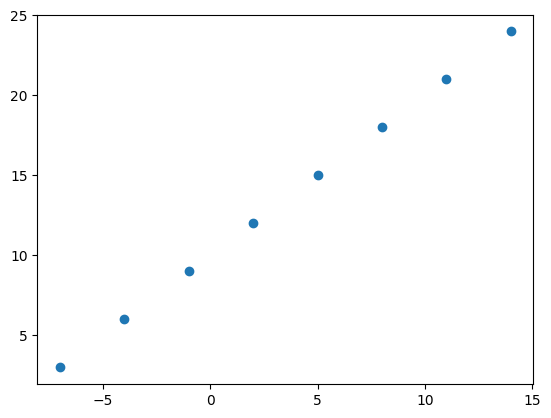

In [ ]:
plt.scatter(X, y)

## Steps in modelling with TenorFlow

1. **Creating a model** - define the input and output layers as well as the hidden layers of a deep learning model.

2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns it is learning) and evaluation metrics (what we can use to interpret the performance of our model).

3. **Fitting a model** - letting the model try to find patterns between X & y (features & labels).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 730ms/step - loss: 11.4971 - mae: 11.4971
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 11.3646 - mae: 11.3646
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2321 - mae: 11.2321
Epoch 4/5
1/1 [==============================] - 0s 19ms/step - loss: 11.0996 - mae: 11.0996
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 10.9671 - mae: 10.9671


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 127ms/step


array([[12.753318]], dtype=float32)

In [ ]:
y_pred + 11

array([[23.753319]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) withing each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

**Common Ways to improve a deep model:**
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fitting on more data
* Fitting for longer

In [ ]:
# Let's rebuild our model

# 1. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 556ms/step - loss: 17.3064 - mae: 17.3064
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 17.0251 - mae: 17.0251
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 16.7439 - mae: 16.7439
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 16.4626 - mae: 16.4626
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 16.1814 - mae: 16.1814
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 15.9001 - mae: 15.9001
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 15.6189 - mae: 15.6189
Epoch 8/100
1/1 [==============================] - 0s 25ms/step - loss: 15.3376 - mae: 15.3376
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 15.0564 - mae: 15.0564
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 14.8163 - mae: 14.8163
Epoch 11/100
1/1 [==============================] - 0

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if the model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 69ms/step


array([[29.280958]], dtype=float32)

In [ ]:
# Let's make another change

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 696ms/step - loss: 13.6565 - mae: 13.6565
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.3481 - mae: 13.3481
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 13.0395 - mae: 13.0395
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 12.7306 - mae: 12.7306
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 12.4211 - mae: 12.4211
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 12.1109 - mae: 12.1109
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.7998 - mae: 11.7998
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 11.4875 - mae: 11.4875
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 11.1738 - mae: 11.1738
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8583 - mae: 10.8583
Epoch 11/100
1/1 [==============================] - 0

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 91ms/step


array([[27.74636]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you will go through when building neural nerowrks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?

* The model itself - what does our model look like?

* The training of a model - how does a model perform while it learns?

* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

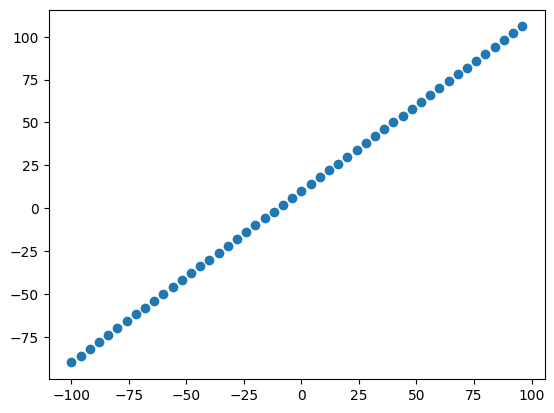

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.

* **Validation set** - the model gets tuned on this data, whcih is typically 10-15% of the data available.

* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# SPlit the data into train and tets sets
X_train = X[:40] # firts 40 training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and tests sets... let's visualize it again!

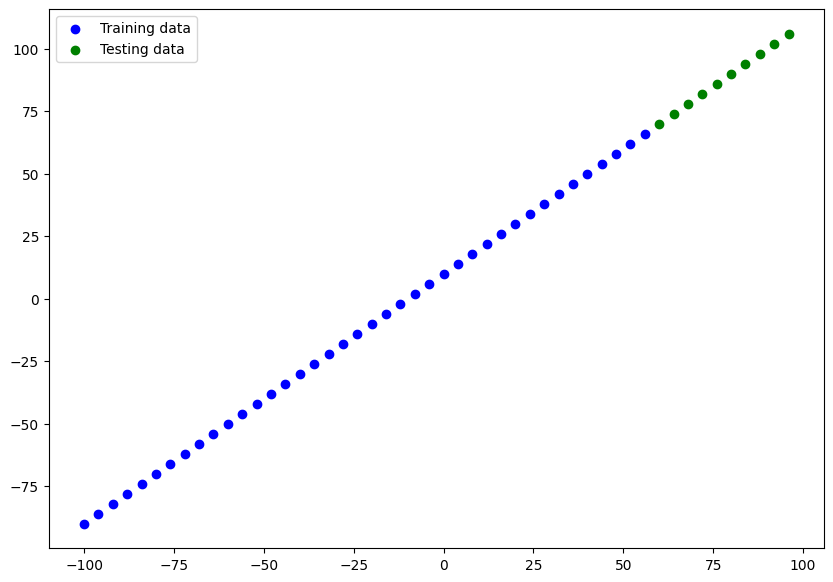

In [ ]:
plt.figure(figsize=(10, 7))
# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # our model will learn on this
#plot the test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data") # want our model to be able to predict this (given X, what is y?)
# show a legend
plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X_train, axis=1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 93.6945 - mae: 93.6945
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 58.2390 - mae: 58.2390
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 21.4245 - mae: 21.4245
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 13.2056 - mae: 13.2056
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 12.2765 - mae: 12.2765
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 9.5023 - mae: 9.5023
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.6343 - mae: 8.6343
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0753 - mae: 9.0753
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.8612 - mae: 18.8612
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1943 - mae: 10.1943
Epoch 11/100
2/2 [==============================] - 0s 5ms/step 

### Visualizing the model

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other model during **transfer learning**).

📖**Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.
[MIT's introduction to deep learning video.](https://www.youtube.com/watch?v=QDX-1M5Nj7s&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=2&ab_channel=AlexanderAmini)

🛠 **Excersice:** Try palying around with that number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`

In [ ]:
# Let's fit out model to the training data
model.fit(tf.expand_dims(X_train, axis=1),y_train,epochs=100, verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


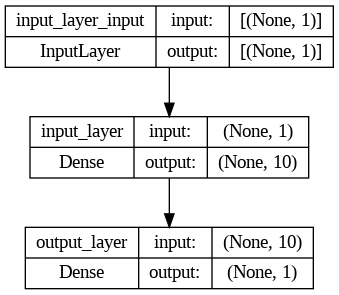

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it is a good idea to plot them against the ground thruth labels.

Often you will see this in the form of `y_test` or `y_true` versus `y_pred` (ground thruth versus model's prediction).

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 139ms/step


array([[ 69.489   ],
       [ 74.005714],
       [ 78.522415],
       [ 83.03912 ],
       [ 87.55583 ],
       [ 92.07254 ],
       [ 96.58926 ],
       [101.105965],
       [105.62267 ],
       [110.13938 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If you feel like you are going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [ ]:
# Let's create a plottling function
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred):
  """
  plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))
  # plot the training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # plot the testting data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # plot the model's predictions in red
  plt.scatter(test_data, y_pred, c="r", label="Predictions")
  # show the legend
  plt.legend();

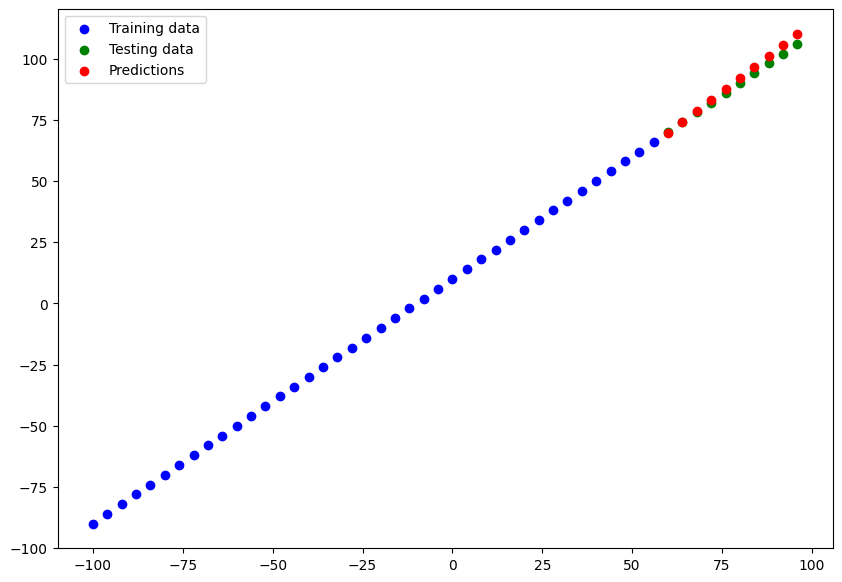

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you are working on, there will be different evaluation metrics to evaluate your model's performance.

Since we are working on a regression problem, two of the main metreics:

* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"

* MSE - mean square error, "square the average erros"

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 312ms/step - loss: 1.9164 - mae: 1.9164


[1.9163910150527954, 1.9163910150527954]

In [ ]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.511002 , 14.796572 , 12.191034 , 10.5921755, 10.       ,
       10.414508 , 11.835703 , 14.263578 , 17.69814  , 22.139381 ],
      dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 69.489   ],
       [ 74.005714],
       [ 78.522415],
       [ 83.03912 ],
       [ 87.55583 ],
       [ 92.07254 ],
       [ 96.58926 ],
       [101.105965],
       [105.62267 ],
       [110.13938 ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.489   ,  74.005714,  78.522415,  83.03912 ,  87.55583 ,
        92.07254 ,  96.58926 , 101.105965, 105.62267 , 110.13938 ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.9163902>

In [ ]:
# calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=5.493939>

In [ ]:
# Make some functions to reuse mae and mse
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).

2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.

3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs

2. `model_2` - 2 layers, trained for 100 epochs

3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X_train, axis=1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 28ms/step - loss: 11.2626 - mae: 11.2626
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 12.8485 - mae: 12.8485
Epoch 3/100
2/2 [==============================] - 0s 18ms/step - loss: 14.7493 - mae: 14.7493
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 10.5758 - mae: 10.5758
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 13.1707 - mae: 13.1707
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 10.4081 - mae: 10.4081
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 12.3773 - mae: 12.3773
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 12.1440 - mae: 12.1440
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 29.2241 - mae: 29.2241
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 19.3480 - mae: 19.3480
Epoch 11/100
2/2 [==============================] - 0s 7

1/1 [==============================] - 0s 85ms/step


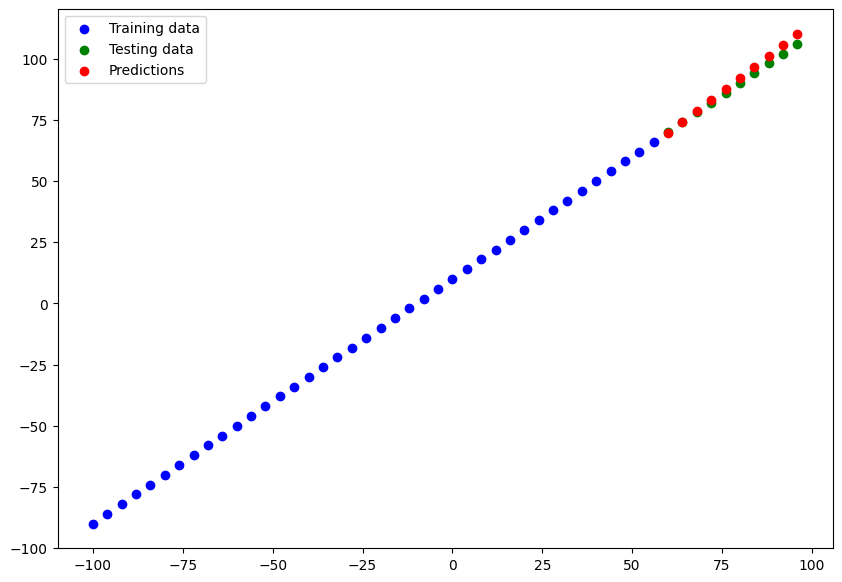

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(tf.expand_dims(X_test, axis=1))
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=129.8175>,
 <tf.Tensor: shape=(), dtype=float32, numpy=17164.059>)

**Build `model_2`**

* 2 dense layers trained for 100 epochs

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_2.fit(tf.expand_dims(X_train, axis=1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 60.3141 - mse: 5770.2222
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 31.8741 - mse: 1354.0839
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 36.5238 - mse: 2021.9934
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 29.0560 - mse: 1245.2010
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 15.7400 - mse: 322.7239
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 12.4796 - mse: 200.4500
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.7515 - mse: 170.4163
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 12.1251 - mse: 203.4908
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 38.1314 - mse: 2247.9351
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 25.6997 - mse: 927.7679
Epoch 11/100
2/2 [========================

1/1 [==============================] - 0s 35ms/step


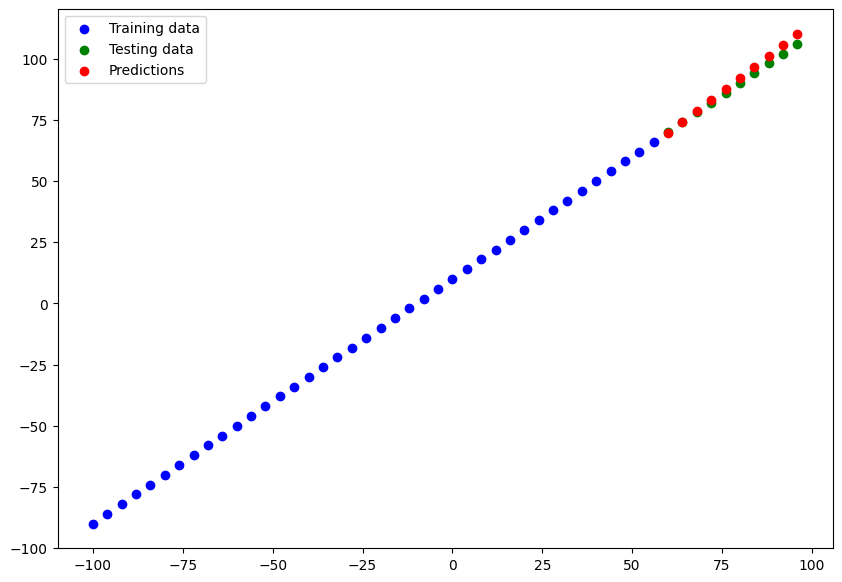

In [ ]:
# Make and plot prediction of model_2
y_preds_2 = model_2.predict(tf.expand_dims(X_test, axis=1))
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.216455>,
 <tf.Tensor: shape=(), dtype=float32, numpy=184.6479>)

**Build `model_3`**
* 2 layers trained for 500 epochs

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_train, axis=1),y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 29.4908 - mae: 29.4908
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 25.7667 - mae: 25.7667
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 30.5612 - mae: 30.5612
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 29.3095 - mae: 29.3095
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 14.2146 - mae: 14.2146
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.3772 - mae: 11.3772
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 12.4133 - mae: 12.4133
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 10.9708 - mae: 10.9708
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 38.8834 - mae: 38.8834
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 26.4813 - mae: 26.4813
Epoch 11/500
2/2 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 47ms/step


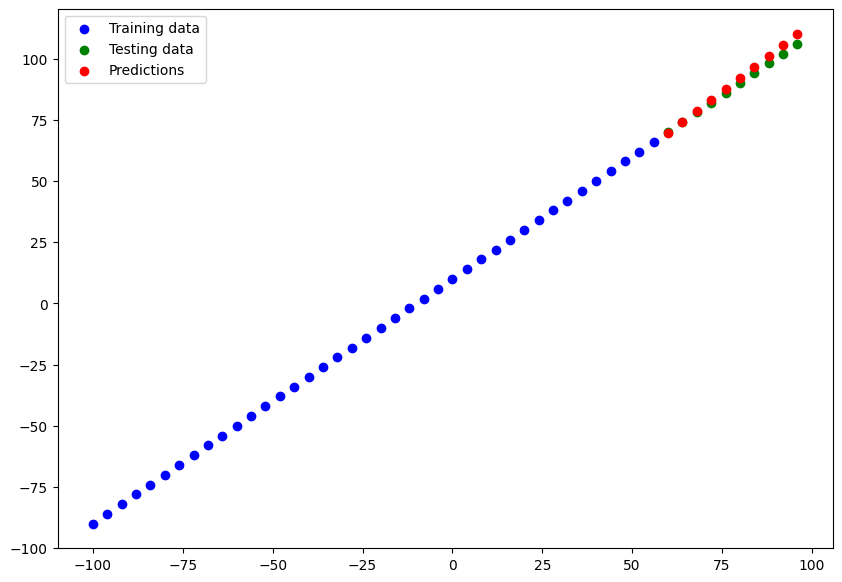

In [ ]:
# Make and plot prediction of model_3
y_preds_3 = model_3.predict(tf.expand_dims(X_test, axis=1))
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.94715>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4701.4766>)

🔑 **Note:** You want to start with small experiments and make sure they work and then increase their scale when necessary

## Comparing the results of our experiments

We've run a few experiments, let's compare the results

In [ ]:
# Let's compare our model's results using a pandas Dataframe
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,129.817505,17164.058594
1,model_2,13.216455,184.647903
2,model_3,67.947151,4701.476562


Looks like `model_2` performed the best...

In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, you will get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be very tedious if you're running lots of experiments.

Luckily, there are tools to help!

📖 **Resource:** As you build more models, you'll want to look into using:
* **TensorBoard** - a component of the TensorFlow library to help track modelling experiments.
* **Weights & Biases** - a tool for trackiing all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of google colab or wherever they were trained auch as in a web application or a mobile app.

There are two  main formats we can save our models too:

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [ ]:
# Save the model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(tf.expand_dims(X_test, axis=1))
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 74ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check to see if loaded.h5 model prediction match model_2
model_2_preds = model_2.predict(tf.expand_dims(X_test, axis=1))
loaded_h5_model_preds = loaded_h5_model.predict(tf.expand_dims(X_test, axis=1))
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 61ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model or any other file from google colab

If you want to download your files from google colab:

1. you can go to the files tab and right click on the file and click "download".
2. use code (see the cell below).
3. save it to google drive by connecting google drive and copying it there (see 2nd code cell below).

In [ ]:
# Download a file from google colab
# from google.colab import files
# files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from google colab to google drive
# !cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/TenserFlow

In [ ]:
# !ls /content/drive/MyDrive/TenserFlow

best_model_HDF5_format.h5


## A larger example

In [ ]:
# Import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# One-hot encoding the dataframe so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create x and y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
len(X), len(X_train), len(X_test)


(1338, 1070, 268)

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. fit the model
insurance_model.fit(tf.expand_dims(X_train, axis=1),y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8588.2949 - mae: 8588.2949
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7871.1279 - mae: 7871.1279
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7313.9800 - mae: 7313.9800
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7578.2759 - mae: 7578.2759
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7662.7422 - mae: 7662.7422
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7610.1406 - mae: 7610.1406
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7553.5024 - mae: 7553.5024
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7722.6494 - mae: 7722.6494
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7484.0596 - mae: 7484.0596
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7684.3716 - mae: 7684.3716

In [ ]:
# CHeck the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 6922.7231 - mae: 6922.7231


[6922.72314453125, 6922.72314453125]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now the model is not performing too well... let's improve the model

To (try) improve the model, run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Train for longer

In [ ]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

insurance_model_2.fit(tf.expand_dims(X_train, axis=1),y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13296.4834 - mae: 13296.4834
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13098.7578 - mae: 13098.7578
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12718.1504 - mae: 12718.1504
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 11993.3848 - mae: 11993.3848
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 10809.9775 - mae: 10809.9775
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9343.9805 - mae: 9343.9805
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8053.3354 - mae: 8053.3354
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7509.2642 - mae: 7509.2642
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7431.1978 - mae: 7431.1978
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7410.5796 - mae:

In [ ]:
# Evaluate the model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4489.3794 - mae: 4489.3794


[4489.37939453125, 4489.37939453125]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 6922.7231 - mae: 6922.7231


[6922.72314453125, 6922.72314453125]

In [ ]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history = insurance_model_3.fit(tf.expand_dims(X_test, axis=1), y_test, epochs=500)

Epoch 1/500
9/9 [==============================] - 1s 3ms/step - loss: 12949.8174 - mae: 12949.8174
Epoch 2/500
9/9 [==============================] - 0s 2ms/step - loss: 12922.3857 - mae: 12922.3857
Epoch 3/500
9/9 [==============================] - 0s 2ms/step - loss: 12892.3018 - mae: 12892.3018
Epoch 4/500
9/9 [==============================] - 0s 2ms/step - loss: 12857.2588 - mae: 12857.2588
Epoch 5/500
9/9 [==============================] - 0s 3ms/step - loss: 12815.8154 - mae: 12815.8154
Epoch 6/500
9/9 [==============================] - 0s 2ms/step - loss: 12764.4082 - mae: 12764.4082
Epoch 7/500
9/9 [==============================] - 0s 2ms/step - loss: 12701.2236 - mae: 12701.2236
Epoch 8/500
9/9 [==============================] - 0s 2ms/step - loss: 12622.9961 - mae: 12622.9961
Epoch 9/500
9/9 [==============================] - 0s 2ms/step - loss: 12526.8408 - mae: 12526.8408
Epoch 10/500
9/9 [==============================] - 0s 2ms/step - loss: 12410.3799 - mae: 12410.3799

In [ ]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3591.0476 - mae: 3591.0476


[3591.047607421875, 3591.047607421875]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6922.7231 - mae: 6922.7231


[6922.72314453125, 6922.72314453125]

Text(0.5, 0, 'epochs')

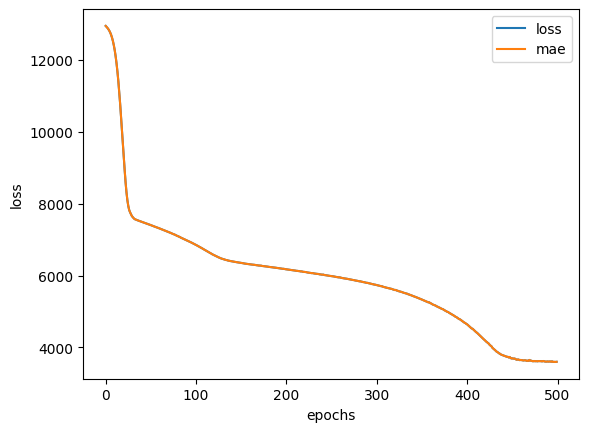

In [ ]:
# Plot history also known as a loss curve or a training curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

To figure out when to stop training your model, you can use the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to the model to stop trainig once it stops improving a certain metric

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If unsure on which to use, try both and see which performs better

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these collumns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

The data has been noemlaized and one hot encoded. Now build a neural network and see how it goes

In [ ]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                               optimizer=tf.keras.optimizers.SGD(),
                               metrics=["mae"])

insurance_model_4.fit(tf.expand_dims(X_train_normal, axis=1), y_train, epochs=350)

Epoch 1/350
34/34 [==============================] - 1s 4ms/step - loss: 13339.7256 - mae: 13339.7256
Epoch 2/350
34/34 [==============================] - 0s 2ms/step - loss: 11191.0273 - mae: 11191.0273
Epoch 3/350
34/34 [==============================] - 0s 2ms/step - loss: 6135.9214 - mae: 6135.9214
Epoch 4/350
34/34 [==============================] - 0s 2ms/step - loss: 5491.5273 - mae: 5491.5273
Epoch 5/350
34/34 [==============================] - 0s 2ms/step - loss: 5255.6377 - mae: 5255.6377
Epoch 6/350
34/34 [==============================] - 0s 2ms/step - loss: 5403.6138 - mae: 5403.6138
Epoch 7/350
34/34 [==============================] - 0s 2ms/step - loss: 5053.6216 - mae: 5053.6216
Epoch 8/350
34/34 [==============================] - 0s 2ms/step - loss: 5471.7319 - mae: 5471.7319
Epoch 9/350
34/34 [==============================] - 0s 2ms/step - loss: 4918.5532 - mae: 4918.5532
Epoch 10/350
34/34 [==============================] - 0s 3ms/step - loss: 5005.9722 - mae: 5005.

In [ ]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4365.8105 - mae: 4365.8105


[4365.810546875, 4365.810546875]